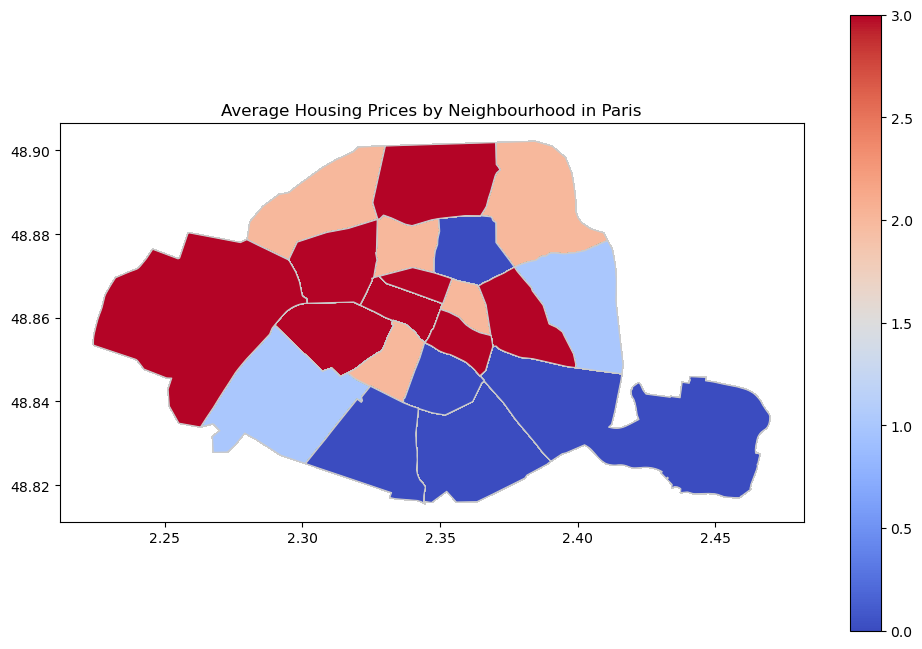

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('listings.csv', delimiter=';', low_memory=False)

# Convert the 'price' column to numeric, errors='coerce' will turn invalid parsing into NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Now drop any rows with NaN in 'price' column (which were originally non-numeric values)
df = df.dropna(subset=['price'])

# Correct the misspelling
df['neighbourhood'] = df['neighbourhood'].replace('√âlys√©e', 'Élysée')

# Load the shapefile of Paris neighborhoods
neighborhoods = gpd.read_file('neighbourhoods.geojson')

# Filter rows that contain geolocation instead of neighbourhood names
df = df[df['neighbourhood'].isin(neighborhoods['neighbourhood'])]

# Create a new column 'price_group' that indicates which quartile the average price of each neighbourhood is in
df['price_group'] = pd.qcut(df['price'], 4, labels=False)

# Merge the data with the shapefile
merged_data = neighborhoods.merge(df, left_on='neighbourhood', right_on='neighbourhood', how='left')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='price_group', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=df['price_group'].min(), vmax=df['price_group'].max()))
fig.colorbar(sm, ax=ax)

# Set the title
ax.set_title('Average Housing Prices by Neighbourhood in Paris')

# Show the map
plt.show()
